In [ ]:
%matplotlib inline

from google.colab import drive, files
import numpy as np
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import glob
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
DIR = "/content/drive/MyDrive/coding/Image Stats/rapid_3/"

In [ ]:
imgs = glob.glob(DIR+"*.jpg")
imgs = imgs[:4]
imgs

['/content/drive/MyDrive/coding/Image Stats/rapid_3/0.jpg',
 '/content/drive/MyDrive/coding/Image Stats/rapid_3/2.jpg',
 '/content/drive/MyDrive/coding/Image Stats/rapid_3/3.jpg',
 '/content/drive/MyDrive/coding/Image Stats/rapid_3/1.jpg']

In [ ]:
images = {}
for i in range(len(imgs)):
  im = Image.open(imgs[i])
  images[i] = np.array(im)

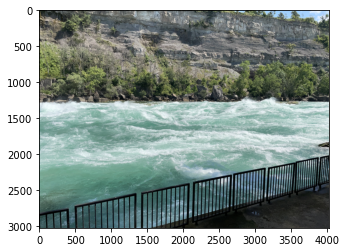

In [ ]:
plt.imshow(images[3])

In [ ]:
def greyscale(image):
  image = (0.3 * image[:, :, 0]) + (0.59 * image[:, :, 1]) + (0.11 * image[:, :, 2])
  return image.astype(np.float32)

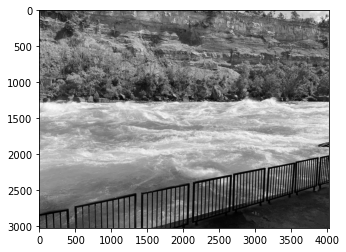

In [ ]:
g = greyscale(images[0])
plt.imshow(g, cmap = "gray")

In [ ]:
def per_px_mean(ims):
  a, b = ims[0].shape[:2]
  output = np.zeros((a, b), dtype = np.float32)
  grays = {}
  for i in range(len(ims)):
    grays[i] = greyscale(ims[i])
  for x in range(a):
    for y in range(b):
      av = 0
      for z in grays.values():
        av += z[x, y]
      av /= len(list(grays.values()))
      output[x, y] = av
  return output/(output.max())
def per_px_max(ims):
  a, b = ims[0].shape[:2]
  output = np.zeros((a, b), dtype = np.float32)
  grays = {}
  for i in range(len(ims)):
    grays[i] = greyscale(ims[i])
  for x in range(a):
    for y in range(b):
      m = 0
      for i in 
      output[x, y] = m
  return output/(output.max())
def per_px_min(ims):
  a, b = ims[0].shape[:2]
  output = np.zeros((a, b), dtype = np.float32)
  grays = {}
  for i in range(len(ims)):
    grays[i] = greyscale(ims[i])
  for x in range(a):
    for y in range(b):
      m = min(list(grays.values))
      output[x, y] = m
  return output/(output.max())
mistmean = per_px_mean(images)
mistmax = per_px_max(images)
mistmin = per_px_min(images)

ValueError: ignored

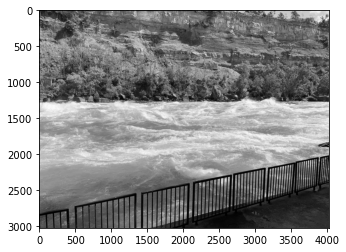

In [ ]:
a, b, c = images[0].shape
stack = np.zeros((a, b, c, len(imgs)), dtype = np.uint8)
for i in range(len(imgs)):
  im = Image.open(imgs[i])
  stack[:, :, :, i] = np.array(im)
gstack = np.zeros((a, b, len(imgs)), dtype = np.float32)
for i in range(len(imgs)):
  gstack[:, :, i] = (0.3 * stack[:, :, 0, i]) + (0.59 * stack[:, :, 1, i]) + (0.11 * stack[:, :, 2, i])
plt.imshow(gstack[:, :, -1], cmap = "gray")

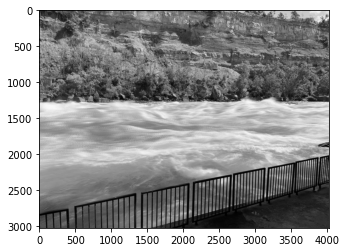

In [ ]:
greymean = gstack.mean(axis=2)
greymax = gstack.max(axis=2)
greymin = gstack.min(axis=2)
plt.imshow(greymean, cmap="gray")

In [ ]:
def misty_rgb(imgs, mode="max"):
  a, b, c, d = imgs.shape
  output = np.zeros((a, b, c), dtype = np.uint8)
  if mode == "max":
    output[:, :, 0] = imgs[:, :, 0, :].max(axis=2)
    output[:, :, 1] = imgs[:, :, 1, :].max(axis=2)
    output[:, :, 2] = imgs[:, :, 2, :].max(axis=2)
  elif mode == "min":
    output[:, :, 0] = imgs[:, :, 0, :].min(axis=2)
    output[:, :, 1] = imgs[:, :, 1, :].min(axis=2)
    output[:, :, 2] = imgs[:, :, 2, :].min(axis=2)
  elif mode == "mean":
    output[:, :, 0] = imgs[:, :, 0, :].mean(axis=2)
    output[:, :, 1] = imgs[:, :, 1, :].mean(axis=2)
    output[:, :, 2] = imgs[:, :, 2, :].mean(axis=2)
  else:
    print("Error: %s is not an option" % mode)
  return output
rgbmax = misty_rgb(stack, mode = 'max')
rgbmin = misty_rgb(stack, mode = 'min')
rgbmean = misty_rgb(stack, mode = 'mean')

(-0.5, 4031.5, 3023.5, -0.5)

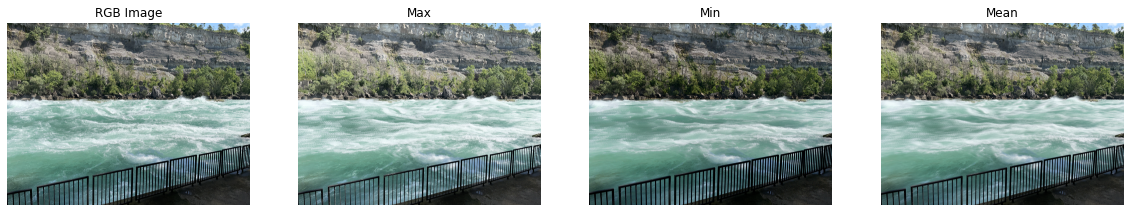

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[20, 8])
ax1.set_title("RGB Image")
ax2.set_title("Max")
ax3.set_title("Min")
ax4.set_title("Mean")

im1 = ax1.imshow(images[0])
im2 = ax2.imshow(rgbmax)
im3 = ax3.imshow(rgbmin)
im4 = ax4.imshow(rgbmean)


ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')